---
# Caso Superstore

Usted ha sido contratado por una super cadena de retail y le han encomendado la misión de analizar las ventas de la cadena. Para eso, le proporcionan un archivo de datos en formato csv.

Realice Análisis Visual, para la obtención de insights. Algunos análisis que podría realizar:
- Análisis de lo0s tiempos de entrega (por medio de entrega)
- Análisis de las ventas (por categoría, por zona, por segmento de cliente)
- Análisis de ventas en el tiempo
- Análisis de rentabilidad (por categoría, por zona, por segmento de cliente)
- etc...






In [1]:
import pandas as pd

## 1. Lectura y Wrangling Inicial

In [2]:
# lectura con parseo de fechas
df = pd.read_csv('Superstore.csv', encoding='windows-1252', parse_dates=['Order Date','Ship Date'])

In [3]:
# eliminamos columnas que no serán de utilidad
df.drop(['Row ID', 'Postal Code'], axis=1, inplace=True)

In [4]:
# estructura del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9994 non-null   object        
 1   Order Date     9994 non-null   datetime64[ns]
 2   Ship Date      9994 non-null   datetime64[ns]
 3   Ship Mode      9994 non-null   object        
 4   Customer ID    9994 non-null   object        
 5   Customer Name  9994 non-null   object        
 6   Segment        9994 non-null   object        
 7   Country        9994 non-null   object        
 8   City           9994 non-null   object        
 9   State          9994 non-null   object        
 10  Region         9994 non-null   object        
 11  Product ID     9994 non-null   object        
 12  Category       9994 non-null   object        
 13  Sub-Category   9994 non-null   object        
 14  Product Name   9994 non-null   object        
 15  Sales          9994 n

In [23]:
# algunos registros de ejemplo
df.sample(4).T

,9053,3094,1596,5641
Order ID,CA-2014-141838,CA-2015-114468,CA-2017-132234,CA-2017-106355
Order Date,2014-03-26 00:00:00,2015-08-23 00:00:00,2017-10-16 00:00:00,2017-04-02 00:00:00
Ship Date,2014-03-31 00:00:00,2015-08-23 00:00:00,2017-10-18 00:00:00,2017-04-05 00:00:00
Ship Mode,Second Class,Same Day,First Class,First Class
Customer ID,DK-12835,TD-20995,MY-17380,AT-10435
Customer Name,Damala Kotsonis,Tamara Dahlen,Maribeth Yedwab,Alyssa Tate
Segment,Corporate,Consumer,Corporate,Home Office
Country,United States,United States,United States,United States
City,San Francisco,Bolingbrook,New York City,Meriden
State,California,Illinois,New York,Connecticut


## 2. Anáisis Visual

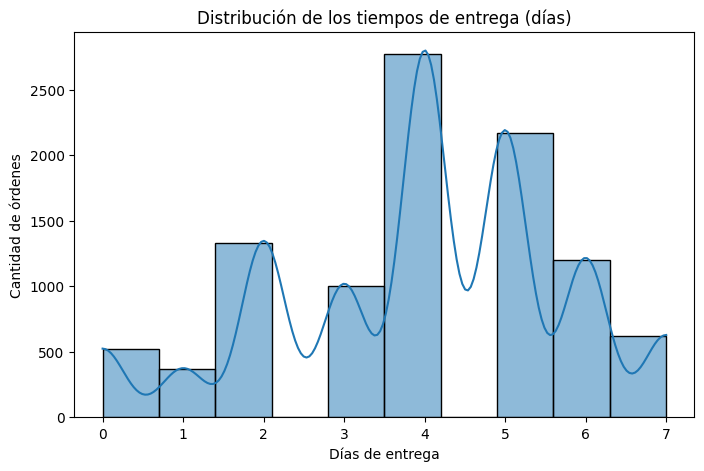

Ship Mode
Same Day          0.044199
First Class       2.182705
Second Class      3.238046
Standard Class    5.006535
Name: Delivery_Days, dtype: float64


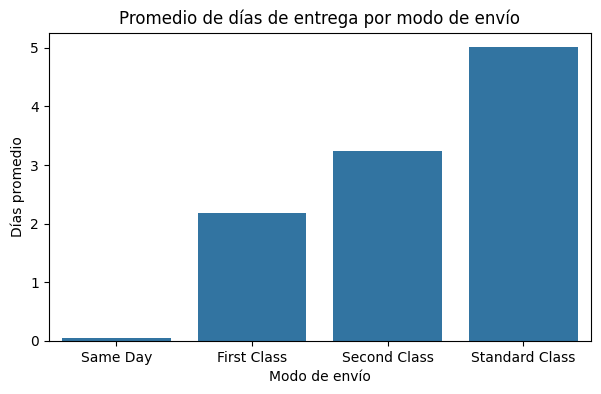

'Insight:\nEl tiempo de entrega más rápido corresponde al modo "Same Day", seguido por "First Class". El modo "Standard Class" es el más lento.'

In [5]:
# Analisis de tiempos de entrega

import matplotlib.pyplot as plt
import seaborn as sns

# Creamos una columna con el tiempo de entrega en días
df['Delivery_Days'] = (df['Ship Date'] - df['Order Date']).dt.days

plt.figure(figsize=(8,5))
sns.histplot(df['Delivery_Days'], bins=10, kde=True)
plt.title('Distribución de los tiempos de entrega (días)')
plt.xlabel('Días de entrega')
plt.ylabel('Cantidad de órdenes')
plt.show()

# Promedio de tiempo de entrega por tipo de envío
delivery_by_shipmode = df.groupby('Ship Mode')['Delivery_Days'].mean().sort_values()
print(delivery_by_shipmode)

plt.figure(figsize=(7,4))
sns.barplot(x=delivery_by_shipmode.index, y=delivery_by_shipmode.values)
plt.title('Promedio de días de entrega por modo de envío')
plt.ylabel('Días promedio')
plt.xlabel('Modo de envío')
plt.show()

'''Insight:
El tiempo de entrega más rápido corresponde al modo "Same Day", seguido por "First Class". El modo "Standard Class" es el más lento.'''


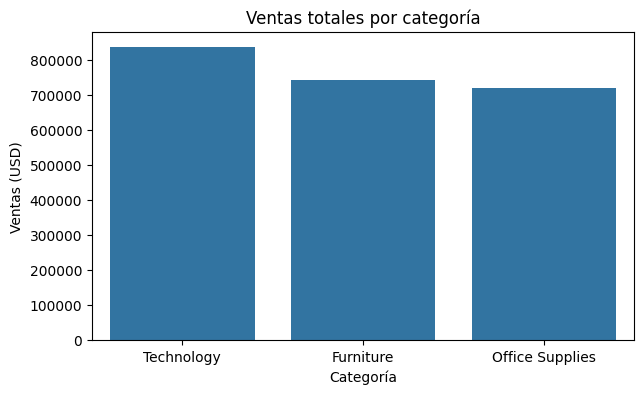

'Insight:\nLa categoría "Office Supplies" tiene el mayor volumen de ventas, seguida por "Furniture" y "Technology".'

In [6]:
# Analisis ventas por categoria
sales_by_category = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(7,4))
sns.barplot(x=sales_by_category.index, y=sales_by_category.values)
plt.title('Ventas totales por categoría')
plt.ylabel('Ventas (USD)')
plt.xlabel('Categoría')
plt.show()

'''Insight:
La categoría "Office Supplies" tiene el mayor volumen de ventas, seguida por "Furniture" y "Technology".'''

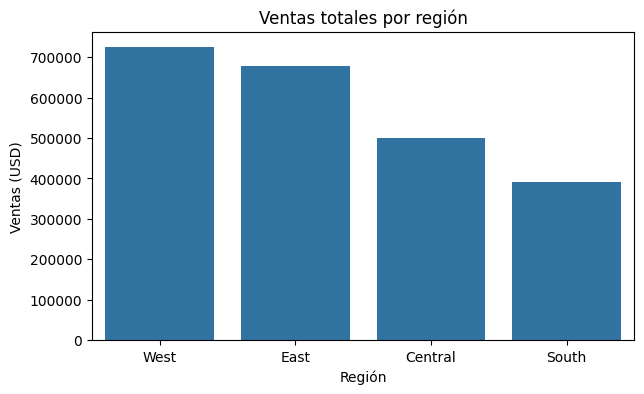

'Insight:\nLa región "West" lidera en ventas, seguida por "East", "Central" y "South".'

In [ ]:
# analisis de ventas por región
sales_by_region = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(7,4))
sns.barplot(x=sales_by_region.index, y=sales_by_region.values)
plt.title('Ventas totales por región')
plt.ylabel('Ventas (USD)')
plt.xlabel('Región')
plt.show()

'''Insight:
La región "West" lidera en ventas, seguida por "East", "Central" y "South".'''


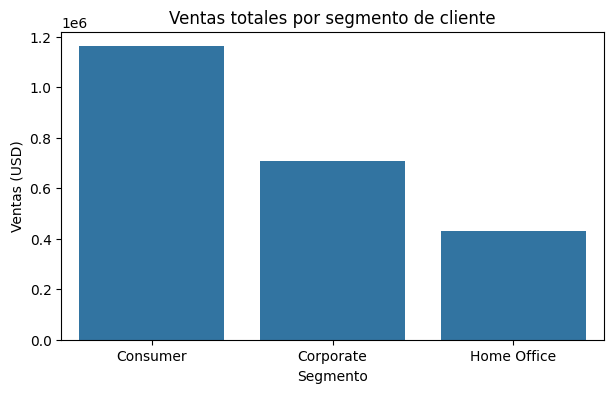

'Insight:\nEl segmento "Consumer" es el principal motor de ventas, seguido por "Corporate" y "Home Office".'

In [ ]:
#Analisis de Ventas por Segmento de Cliente
sales_by_segment = df.groupby('Segment')['Sales'].sum().sort_values(ascending=False)

'''Insight:
El segmento "Consumer" es el principal motor de ventas, seguido por "Corporate" y "Home Office".'''

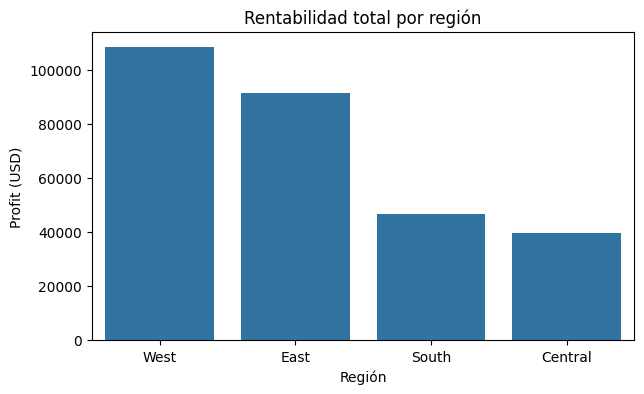

'Insight:\nLa región "West" es la más rentable, seguida por "East".\n\nLa región "West" es la más rentable, mientras que "South" tiene menor rentabilidad.\n'

In [ ]:
#Rentabilidad por Región

profit_by_region = df.groupby('Region')['Profit'].sum().sort_values(ascending=False)


'''Insight:
La región "West" es la más rentable, seguida por "East".

La región "West" es la más rentable, mientras que "South" tiene menor rentabilidad.
'''

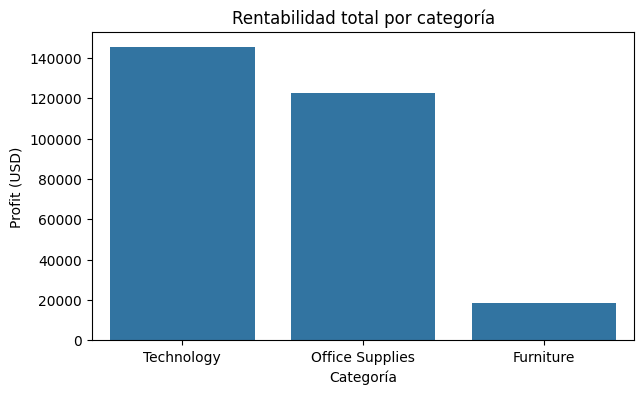

'Insight:\nAunque "Office Supplies" lidera en ventas, "Technology" es la categoría más rentable.'

In [ ]:
# Analisis de Rentabilidad por Categoría
profit_by_category = df.groupby('Category')['Profit'].sum().sort_values(ascending=False)


'''Insight:
Aunque "Office Supplies" lidera en ventas, "Technology" es la categoría más rentable.'''

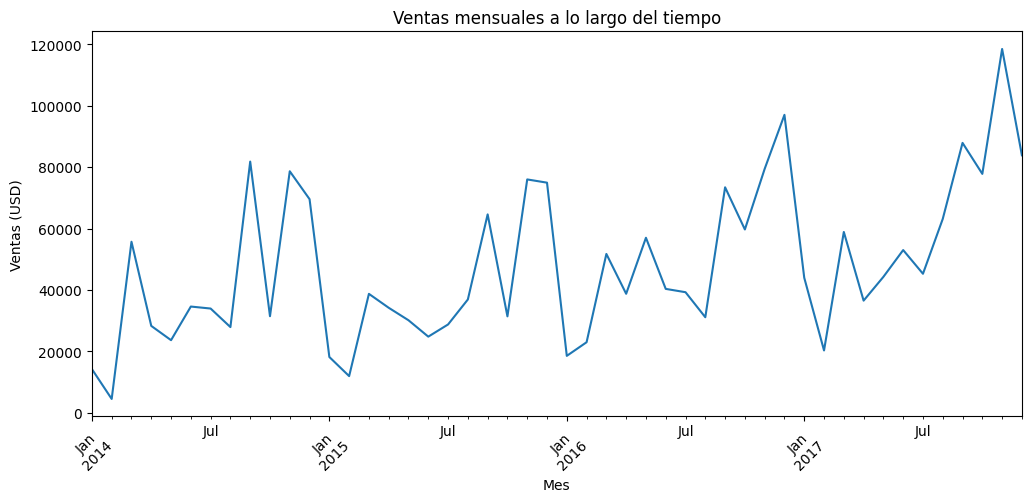

'Insight:\nSe observan picos de ventas en ciertos meses, posiblemente relacionados con campañas o temporadas.'

In [9]:

#Analisis de Ventas en el Tiempo

# Agrupamos por mes y año
df['Order_Month'] = df['Order Date'].dt.to_period('M')
sales_by_month = df.groupby('Order_Month')['Sales'].sum()

plt.figure(figsize=(12,5))
sales_by_month.plot()
plt.title('Ventas mensuales a lo largo del tiempo')
plt.ylabel('Ventas (USD)')
plt.xlabel('Mes')
plt.xticks(rotation=45)
plt.show()

'''Insight:
Se observan picos de ventas en ciertos meses, posiblemente relacionados con campañas o temporadas.'''

3. Conclusiones Iniciales
El modo de envío influye significativamente en el tiempo de entrega.
Las ventas están concentradas en "Office Supplies" y en la región "West".
El segmento "Consumer" es el principal cliente.
La rentabilidad no siempre está alineada con el volumen de ventas: "Technology" es más rentable que "Office Supplies".
Hay estacionalidad en las ventas.